In [ ]:
pip install researchpy

# Importing necessary libraries

In [ ]:
import pandas as pd
import numpy as np
import sklearn
import scipy
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from imblearn.combine import SMOTETomek
from collections import Counter
import researchpy as rp
from imblearn.over_sampling import ADASYN

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Uploading the dataset

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Balanced-All-F-overlap.csv to Balanced-All-F-overlap.csv


# Reading the dataset

In [ ]:
df=pd.read_csv('Balanced-All-F-overlap.csv')
df.head()

,X1,X2,X3,X4,Y
0,1.199653,1.258087,0.982863,1.000315,0
1,1.203599,1.066451,0.534747,0.973330,0
2,1.096427,1.184544,1.293702,1.381156,0
3,0.958135,0.903461,0.918970,0.728722,0
4,1.210144,1.158833,1.160851,1.295831,0


# Exploring the data

In [ ]:
df.columns

Index(['X1', 'X2', 'X3', 'X4', 'Y'], dtype='object')

In [ ]:
df.shape

(300, 5)

In [ ]:
df.describe()

,X1,X2,X3,X4,Y
count,300.000000,300.000000,300.000000,300.000000,300.000000
mean,0.984215,0.997026,0.975882,1.009829,0.500000
std,0.269708,0.218569,0.238782,0.214174,0.500835
min,0.112605,0.361477,0.275235,0.297676,0.000000
25%,0.817970,0.872916,0.831546,0.885946,0.000000
50%,0.992419,0.978608,0.982293,1.007222,0.500000
75%,1.155689,1.115385,1.143743,1.136795,1.000000
max,1.817953,1.821522,1.594692,1.615540,1.000000


In [ ]:
df.isnull().sum()

X1    0
X2    0
X3    0
X4    0
Y     0
dtype: int64

# Statistical and Consistency Analysis

In [ ]:
df['Y'].value_counts()

1    150
0    150
Name: Y, dtype: int64

In [ ]:
df_0 = df[df["Y"] == 0]
df_0.head()

,X1,X2,X3,X4,Y
0,1.199653,1.258087,0.982863,1.000315,0
1,1.203599,1.066451,0.534747,0.973330,0
2,1.096427,1.184544,1.293702,1.381156,0
3,0.958135,0.903461,0.918970,0.728722,0
4,1.210144,1.158833,1.160851,1.295831,0


In [ ]:
rp.summary_cont(df_0)

/usr/local/lib/python3.7/dist-packages/scipy/stats/_distn_infrastructure.py:2003: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
/usr/local/lib/python3.7/dist-packages/scipy/stats/_distn_infrastructure.py:2004: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc


,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,X1,150.0,1.0140,0.2564,0.0209,0.9726,1.0554
1,X2,150.0,1.0245,0.2659,0.0217,0.9816,1.0674
2,X3,150.0,0.9934,0.2562,0.0209,0.9521,1.0348
3,X4,150.0,1.0220,0.2699,0.0220,0.9785,1.0656
4,Y,150.0,0.0000,0.0000,0.0000,NaN,NaN


In [ ]:
np.var(df_0)

X1    0.065321
X2    0.070223
X3    0.065216
X4    0.072375
Y     0.000000
dtype: float64

In [ ]:
scipy.stats.skew(df_0)

array([ 0.15162464,  0.09322401, -0.21753477, -0.26294601,  0.        ])

In [ ]:
df_1 = df[df["Y"] == 1]
df_1.head()

,X1,X2,X3,X4,Y
150,1.246710,1.475663,1.442320,1.190811,1
151,0.802927,0.952989,1.166173,1.194620,1
152,0.772094,0.870613,0.873834,0.995232,1
153,0.913758,1.088622,1.006829,1.142419,1
154,1.086913,1.221481,0.948968,1.087318,1


In [ ]:
rp.summary_cont(df_1)

/usr/local/lib/python3.7/dist-packages/scipy/stats/_distn_infrastructure.py:2003: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
/usr/local/lib/python3.7/dist-packages/scipy/stats/_distn_infrastructure.py:2004: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc


,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,X1,150.0,0.9544,0.2800,0.0229,0.9092,0.9996
1,X2,150.0,0.9696,0.1538,0.0126,0.9447,0.9944
2,X3,150.0,0.9583,0.2194,0.0179,0.9229,0.9937
3,X4,150.0,0.9976,0.1374,0.0112,0.9755,1.0198
4,Y,150.0,1.0000,0.0000,0.0000,NaN,NaN


In [ ]:
np.var(df_1)

X1    0.077903
X2    0.023494
X3    0.047822
X4    0.018762
Y     0.000000
dtype: float64

In [ ]:
scipy.stats.skew(df_1)

array([-0.20842954, -0.02883173, -0.14427437,  0.01866206,  0.        ])

# No difference is present between the number of instances for classes 0 and 1. Hence, it can be attributed as an balanced dataset.

# Plotting of data points for all the 6 combinations of the different features, in order to visualise overlapping.

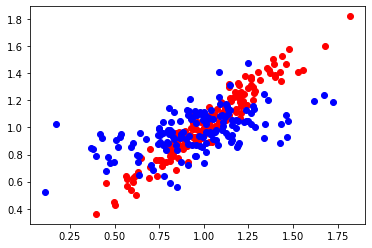

In [ ]:
for i in range(len(df)):
  x1=df.iloc[i,0]
  x2=df.iloc[i,1]
  x3=df.iloc[i,2]
  x4=df.iloc[i,3]
  y=df.iloc[i,4]
  if(y==0):
    plt.scatter(x1,x2,color='red')
  else:
    plt.scatter(x1,x2,color='blue')
plt.show()

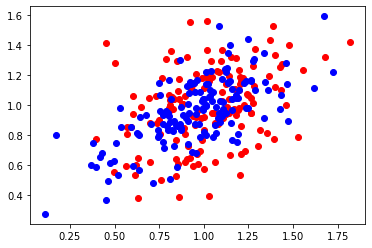

In [ ]:
for i in range(len(df)):
  x1=df.iloc[i,0]
  x2=df.iloc[i,1]
  x3=df.iloc[i,2]
  x4=df.iloc[i,3]
  y=df.iloc[i,4]
  if(y==0):
    plt.scatter(x1,x3,color='red')
  else:
    plt.scatter(x1,x3,color='blue')
plt.show()

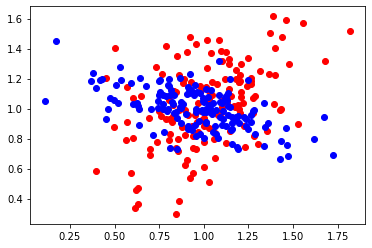

In [ ]:
for i in range(len(df)):
  x1=df.iloc[i,0]
  x2=df.iloc[i,1]
  x3=df.iloc[i,2]
  x4=df.iloc[i,3]
  y=df.iloc[i,4]
  if(y==0):
    plt.scatter(x1,x4,color='red')
  else:
    plt.scatter(x1,x4,color='blue')
plt.show()

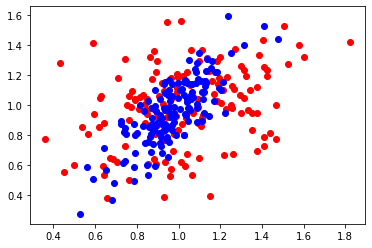

In [ ]:
for i in range(len(df)):
  x1=df.iloc[i,0]
  x2=df.iloc[i,1]
  x3=df.iloc[i,2]
  x4=df.iloc[i,3]
  y=df.iloc[i,4]
  if(y==0):
    plt.scatter(x2,x3,color='red')
  else:
    plt.scatter(x2,x3,color='blue')
plt.show()

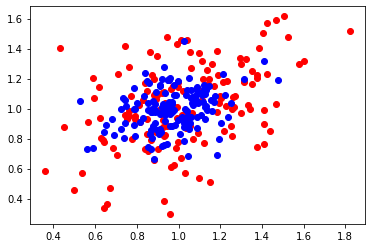

In [ ]:
for i in range(len(df)):
  x1=df.iloc[i,0]
  x2=df.iloc[i,1]
  x3=df.iloc[i,2]
  x4=df.iloc[i,3]
  y=df.iloc[i,4]
  if(y==0):
    plt.scatter(x2,x4,color='red')
  else:
    plt.scatter(x2,x4,color='blue')
plt.show()

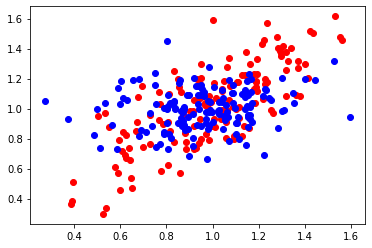

In [ ]:
for i in range(len(df)):
  x1=df.iloc[i,0]
  x2=df.iloc[i,1]
  x3=df.iloc[i,2]
  x4=df.iloc[i,3]
  y=df.iloc[i,4]
  if(y==0):
    plt.scatter(x3,x4,color='red')
  else:
    plt.scatter(x3,x4,color='blue')
plt.show()

# Hence, it can be confirmed from the above scatter plots that all of the features overlap with one another as expected.

# Data Splicing

In [ ]:
x=df.drop('Y',axis=1)
y=df['Y']

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=1)

# Decision Tree Clasiifier

In [ ]:
tree = DecisionTreeClassifier()
tree_fit = tree.fit(x_train,y_train)
y_pred = tree_fit.predict(x_test)
print("Accuracy Score = %.3f" %accuracy_score(y_test,y_pred))
print("\nConfusion Matrix : \n", confusion_matrix(y_test,y_pred))
print("\nClassification Report : \n", classification_report(y_test,y_pred))
v_acc = cross_val_score(tree, x_train, y_train, cv=10, scoring='accuracy')
v_pre = cross_val_score(tree, x_train, y_train, cv=10, scoring='precision')
v_rec = cross_val_score(tree, x_train, y_train, cv=10, scoring='recall')
print("\nAccuracy using 10 fold Cross validation = ",v_acc.mean())
print("\nPrecision using 10 fold Cross validation = ",v_pre.mean())
print("\nRecall using 10 fold Cross validation = ",v_rec.mean())

Accuracy Score = 0.800

Confusion Matrix : 
 [[26 10]
 [ 5 34]]

Classification Report : 
               precision    recall  f1-score   support

           0       0.84      0.72      0.78        36
           1       0.77      0.87      0.82        39

    accuracy                           0.80        75
   macro avg       0.81      0.80      0.80        75
weighted avg       0.80      0.80      0.80        75


Accuracy using 10 fold Cross validation =  0.7021739130434782

Precision using 10 fold Cross validation =  0.7274475524475525

Recall using 10 fold Cross validation =  0.6954545454545455


# KNN Classifier

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn_fit = knn.fit(x_train,y_train)
y_pred = knn_fit.predict(x_test)
print("Accuracy Score = %.3f" %accuracy_score(y_test,y_pred))
print("\nConfusion Matrix : \n", confusion_matrix(y_test,y_pred))
print("\nClassification Report : \n", classification_report(y_test,y_pred))
v_acc = cross_val_score(knn, x_train, y_train, cv=10, scoring='accuracy')
v_pre = cross_val_score(knn, x_train, y_train, cv=10, scoring='precision')
v_rec = cross_val_score(knn, x_train, y_train, cv=10, scoring='recall')
print("\nAccuracy using 10 fold Cross validation = ",v_acc.mean())
print("\nPrecision using 10 fold Cross validation = ",v_pre.mean())
print("\nRecall using 10 fold Cross validation = ",v_rec.mean())

Accuracy Score = 0.800

Confusion Matrix : 
 [[26 10]
 [ 5 34]]

Classification Report : 
               precision    recall  f1-score   support

           0       0.84      0.72      0.78        36
           1       0.77      0.87      0.82        39

    accuracy                           0.80        75
   macro avg       0.81      0.80      0.80        75
weighted avg       0.80      0.80      0.80        75


Accuracy using 10 fold Cross validation =  0.7964426877470355

Precision using 10 fold Cross validation =  0.7604062604062604

Recall using 10 fold Cross validation =  0.8469696969696969


# SVM Classifier

In [ ]:
mod = SVC()
mod_fit = mod.fit(x_train,y_train)
y_pred = mod_fit.predict(x_test)
print("Accuracy Score = %.3f" %accuracy_score(y_test,y_pred))
print("\nConfusion Matrix : \n", confusion_matrix(y_test,y_pred))
print("\nClassification Report : \n", classification_report(y_test,y_pred))
v_acc = cross_val_score(mod, x_train, y_train, cv=10, scoring='accuracy')
v_pre = cross_val_score(mod, x_train, y_train, cv=10, scoring='precision')
v_rec = cross_val_score(mod, x_train, y_train, cv=10, scoring='recall')
print("\nAccuracy using 10 fold Cross validation = ",v_acc.mean())
print("\nPrecision using 10 fold Cross validation = ",v_pre.mean())
print("\nRecall using 10 fold Cross validation = ",v_rec.mean())

Accuracy Score = 0.853

Confusion Matrix : 
 [[28  8]
 [ 3 36]]

Classification Report : 
               precision    recall  f1-score   support

           0       0.90      0.78      0.84        36
           1       0.82      0.92      0.87        39

    accuracy                           0.85        75
   macro avg       0.86      0.85      0.85        75
weighted avg       0.86      0.85      0.85        75


Accuracy using 10 fold Cross validation =  0.7772727272727272

Precision using 10 fold Cross validation =  0.7203208229678818

Recall using 10 fold Cross validation =  0.9098484848484848
